In [110]:
from Bio import Phylo
from Bio import SeqIO
import pandas as pd
from Bio.SeqUtils import GC
import numpy as np
import matplotlib.pyplot as plt

tree = Phylo.read('tree.nwk', 'newick')
Phylo.draw_ascii(tree)

 , rh.61
 |
 |_ rh.58
 |
 |                               , pi.2
 |           ____________________|
 |          |                    , pi.3
 |          |                    |
 |          |                    | pi.1
 |          |
 |          |           , rh.10
 |        __|          _|
 |       |  |         | , bb.1
 |       |  |         | |
 |       |  |  _______| | bb.2
 |       |  | |       |
 |       |  | |       | _ hu.17
 |       |  | |       ||
 |       |  |_|        | hu.6
 |       |    |
 |       |    |    _______ rh.2
 |       |    |   |
 |       |    |___|          __ rh.40
 |       |        |         |
 |       |        |_________|, hu.67
 |       |                  ||
 |       |                  |, hu.37
 |       |                   |
 |       |                   , hu.40
 |       |                   |
 |       |                   | hu.66
 |       |                   |
 |       |                   , hu.41
 |       |                   |
 |       |                   | rh.38
 

###### To find out the relationship between DNA sequences, we can quantitatively and qualitatively compare them in a multitude of ways. To characterize their base pair similarity, we perform multiple sequence alignment of the sequences and count the number of deletions, substitutions, and insertions present to transfor the ancestral to descendent strand. Alternatively, we can compare the amino acid sequence post translation, the ribosome binding sites, and promoters to find similarities between sequences. DNA sequences are composed of promoters, D-S sequences, ribosome binding sites, and termination sites in addition to the cds. By analyzing the base pair alignments of these individual parts we can track ancestry more precisely of individual components.


##### Branches indicate variation from the ancestral genome while clusters indicate genetic similarity between member branches. The obvious clusters of sequences are the sequences closest to one another on the tree, with the 'latest' historical branching points. For example, hu.14, hu.31, and hu.32 form a cluster as well as rh.35, rh.36, and rh.37. Based on purely qualitative tree observation, bb.1,2 cluster appears distant from hu.14 and rh.50 based on the amount of branch points separating the genomes.  
    

In [2]:
cluster_representatives = ['rh.64', 'cy.4', 'pi.3', 'bb.2', 'hu.37', 'rh.36', 'hu.46']
seqdict = SeqIO.to_dict(SeqIO.parse('seqs.fa', 'fasta'))
for x in cluster_representatives:
    print(x + ' : ' + seqdict[x].seq)


rh.64 : atggctgccgatggttatcttccagattggctcgaggacaacctctctgagggcattcgcgagtggtgggacctgaaacctggagccccgaaacccaaagccaaccagcaaaagcaggacgacggccggggtctggtgcttcctggctacaagtacctcggacccttcaacggactcgacaagggggagcccgtcaacgcggcggacgcagcggccctcgagcacgacaaggcctacgaccagcagctcaaagcgggtgacaatccgtacctgcggtataatcacgccgacgccgagtttcaggagcgtctgcaagaagatacgtcttttgggggcaacctcgggcgagcagtcttccaggccaagaagcgggttctcgaacctctcggtctggttgaggaaggcgctaagacggctcctggaaagaagagaccggtagagccgtcaccacagcgttcccccgactcctccacgggcatcggcaagaaaggccagcagcccgccagaaagagactcaatttcggtcagactggcgactcagagtcagtccccgaccctcaacctatcggagaacctccagcagcgccctctagtgtgggatctggtacaatggctgcaggcggtggcgcaccaatggcagacaataacgaaggtgccgacggagtgggtagttcctcgggaaattggcattgcgattccacatggctgggcgacagagtcatcaccaccagcacccgaacctgggccctgcccacctacaacaaccacctctacaagcaaatctccaacgggacctcgggaggcagcaccaacgacaacacctactttggctacagcaccccctgggggtattttgactttaacagattccactgccacttctcaccacgtgactggcagcgactcatcaacaacaactggggattccggcccaagagactcagcttcaagctcttcaacatccaggtcaaagaggtcacgcagaatgaagg

#### BLAST Matches
##### rh.64: Adeno-associated virus isolate rh.64 capsid protein VP1 (cap) gene
##### cy.4: Non-human primate Adeno-associated virus isolate AAVcy.4 capsid protein (VP1) gene
##### pi.3: Adeno-associated virus isolate pi.3 capsid protein VP1 (cap) gene
##### bb.2: Non-human primate Adeno-associated virus isolate AAVbb.2 capsid protein (VP1) gene
##### hu.37: Adeno-associated virus isolate hu.37 capsid protein VP1 (cap) gene
##### rh.36: Non-human primate Adeno-associated virus isolate AAVrh.36 capsid protein (VP1) gene
##### hu.46: Adeno-associated virus isolate hu.46 capsid protein VP1 (cap) gene

##### Each BLAST result indicated that all of these genes matches an adeno-associated virus isolate, some from non-human primates. While we cannot trust the results 100% because BLAST is open source, a predetermined tree in accordance with the BLAST data confirms that the genetic homolgy of our matches is correct. 


# Creating a dictionary of clusters and creating a data frame of GC content

In [24]:
dictionary_clusters = {'cluster_1' : ['pi.2', 'pi.3', 'pi.1'],
                       'cluster_2' : ['rh.10', 'bb.1', 'bb.2','hu.17', 'hu.6'],
                       'cluster_3' : ['hu.67', 'hu.37', 'hu.40', 'hu.66', 'hu.41', 'rh.38', 'hu.42'],
                       'cluster_4' : ['cy.3', 'cy.6', 'cy.4', 'cy.5', 'rh.13'],
                       'cluster_5' : ['hu.43', 'hu.48', 'hu.44', 'hu.46'],
                       'cluster_6' : ['hu.14', 'hu.31', 'hu.32', 'rh.43'],
                       'cluster_7' : ['rh.49', 'rh.53', 'rh.51', 'rh.57', 'rh.50']

}
msa_aligned_dict = SeqIO.to_dict(SeqIO.parse('seqs.aligned.fa', 'fasta'))
gc_df = pd.DataFrame(index = dictionary_clusters.keys(), columns = list(range(2238)))

for index, row in gc_df.iterrows():
    list_of_clusters = dictionary_clusters[index]
    for i in list(range(2238)):
        bp = np.array([])
        for j in list_of_clusters:
            bp = np.append(bp, msa_aligned_dict.get(j).seq[i])
        row[i] = GC(list(bp)) / 100   
    

In [25]:
gc_df

,0,1,2,3,4,5,6,7,8,9,...,2228,2229,2230,2231,2232,2233,2234,2235,2236,2237
cluster_1,0,0,1,1,1,0,1,1,0,1,...,0,0,0,0,1,0,1,0,0,0
cluster_2,0,0,1,1,1,0,1,1,1,1,...,0,0,0,0.2,1,0,1,0,0,0
cluster_3,0,0,1,1,1,0,1,1,0,1,...,0,0,0,0,1,0,1,0,0,0
cluster_4,0,0,1,1,1,0,1,1,1,1,...,0,0,0,1,1,0,1,0,0,0
cluster_5,0,0,1,1,1,0,1,1,0.75,1,...,0,1,1,1,1,0,1,0,0,0
cluster_6,0,0,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0
cluster_7,0,0,1,1,0.8,0,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0


# Evaluating AC Content

In [30]:
at_df = gc_df.copy()
for index, row in at_df.iterrows():
    for i in list(range(2238)):
        row[i] = 1 - row[i]

In [31]:
at_df

,0,1,2,3,4,5,6,7,8,9,...,2228,2229,2230,2231,2232,2233,2234,2235,2236,2237
cluster_1,1,1,0,0,0,1,0,0,1,0,...,1,1,1,1,0,1,0,1,1,1
cluster_2,1,1,0,0,0,1,0,0,0,0,...,1,1,1,0.8,0,1,0,1,1,1
cluster_3,1,1,0,0,0,1,0,0,1,0,...,1,1,1,1,0,1,0,1,1,1
cluster_4,1,1,0,0,0,1,0,0,0,0,...,1,1,1,0,0,1,0,1,1,1
cluster_5,1,1,0,0,0,1,0,0,0.25,0,...,1,0,0,0,0,1,0,1,1,1
cluster_6,1,1,0,0,0,1,0,0,0,0,...,1,1,1,1,0,1,0,1,1,1
cluster_7,1,1,0,0,0.2,1,0,0,0,0,...,1,1,1,1,0,1,0,1,1,1


## AT GC Ratio Cluster Graphs

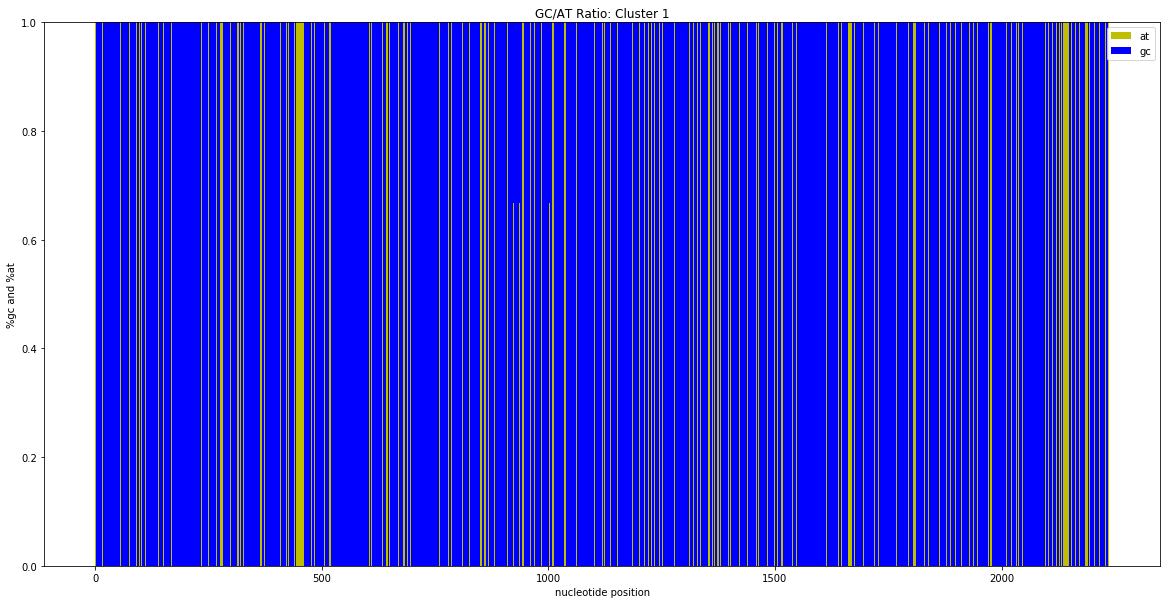

In [46]:
at = np.array(at_df.iloc[0])
gc = np.array(gc_df.iloc[0])
ratio_figure = plt.gcf()
indices = np.arange(2238)
ratio_figure.set_size_inches(20,10)
width = 2
plot_at = plt.bar(indices, at, width, color='y')
plot_gc = plt.bar(indices, gc, width, bottom=at, color='b')
plt.title('GC/AT Ratio: Cluster 1')
plt.legend((plot_at[0], plot_gc[0]), ('at','gc'))
plt.xlabel('nucleotide position')
plt.ylabel('%gc and %at')
plt.show()

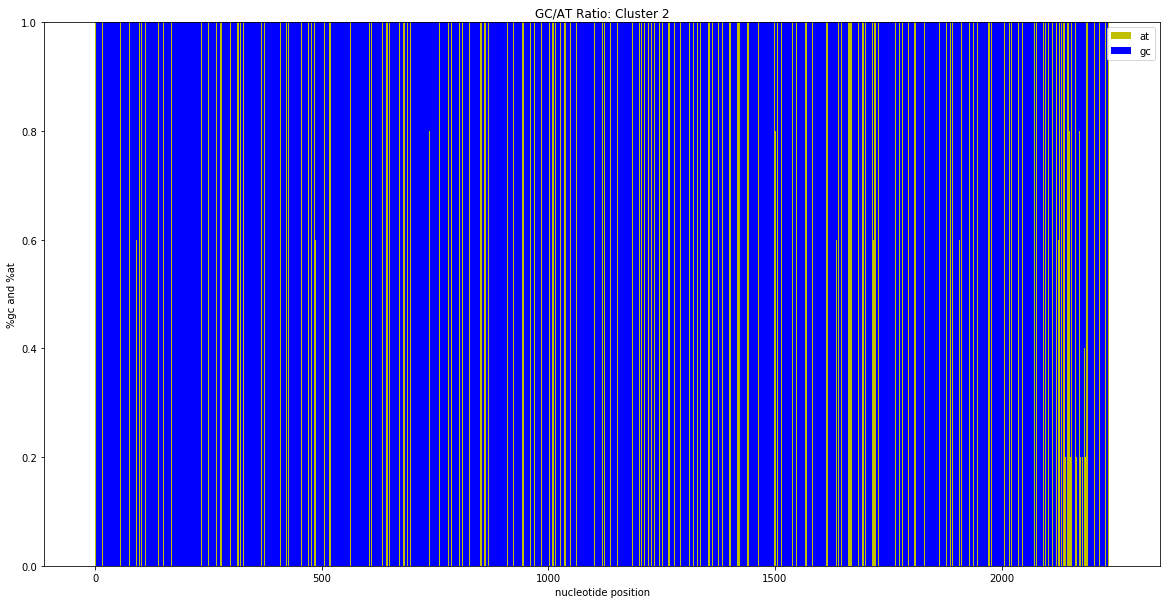

In [47]:
at = np.array(at_df.iloc[1])
gc = np.array(gc_df.iloc[1])
ratio_figure = plt.gcf()
indices = np.arange(2238)
ratio_figure.set_size_inches(20,10)
width = 2
plot_at = plt.bar(indices, at, width, color='y')
plot_gc = plt.bar(indices, gc, width, bottom=at, color='b')
plt.title('GC/AT Ratio: Cluster 2')
plt.legend((plot_at[0], plot_gc[0]), ('at','gc'))
plt.xlabel('nucleotide position')
plt.ylabel('%gc and %at')
plt.show()

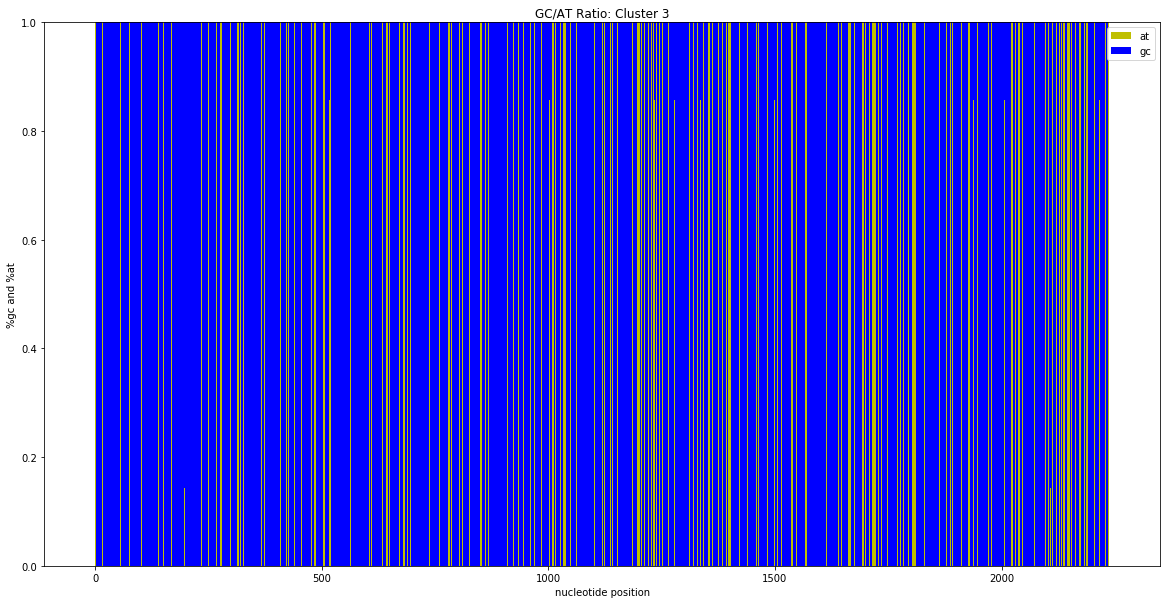

In [48]:
at = np.array(at_df.iloc[2])
gc = np.array(gc_df.iloc[2])
ratio_figure = plt.gcf()
indices = np.arange(2238)
ratio_figure.set_size_inches(20,10)
width = 2
plot_at = plt.bar(indices, at, width, color='y')
plot_gc = plt.bar(indices, gc, width, bottom=at, color='b')
plt.title('GC/AT Ratio: Cluster 3')
plt.legend((plot_at[0], plot_gc[0]), ('at','gc'))
plt.xlabel('nucleotide position')
plt.ylabel('%gc and %at')
plt.show()

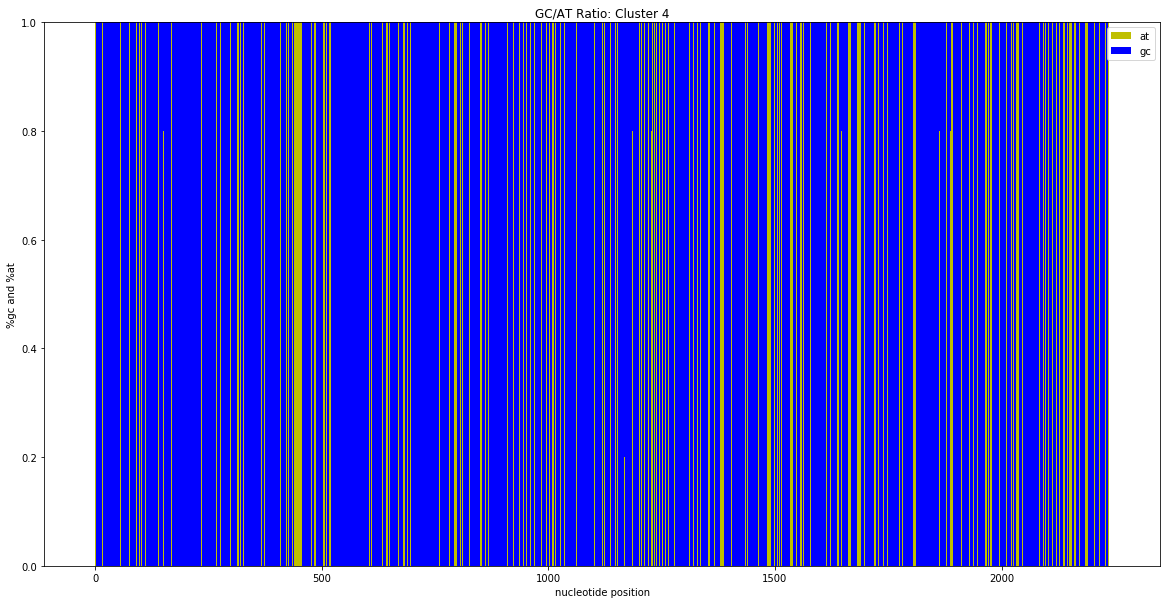

In [50]:
at = np.array(at_df.iloc[3])
gc = np.array(gc_df.iloc[3])
ratio_figure = plt.gcf()
indices = np.arange(2238)
ratio_figure.set_size_inches(20,10)
width = 2
plot_at = plt.bar(indices, at, width, color='y')
plot_gc = plt.bar(indices, gc, width, bottom=at, color='b')
plt.title('GC/AT Ratio: Cluster 4')
plt.legend((plot_at[0], plot_gc[0]), ('at','gc'))
plt.xlabel('nucleotide position')
plt.ylabel('%gc and %at')
plt.show()

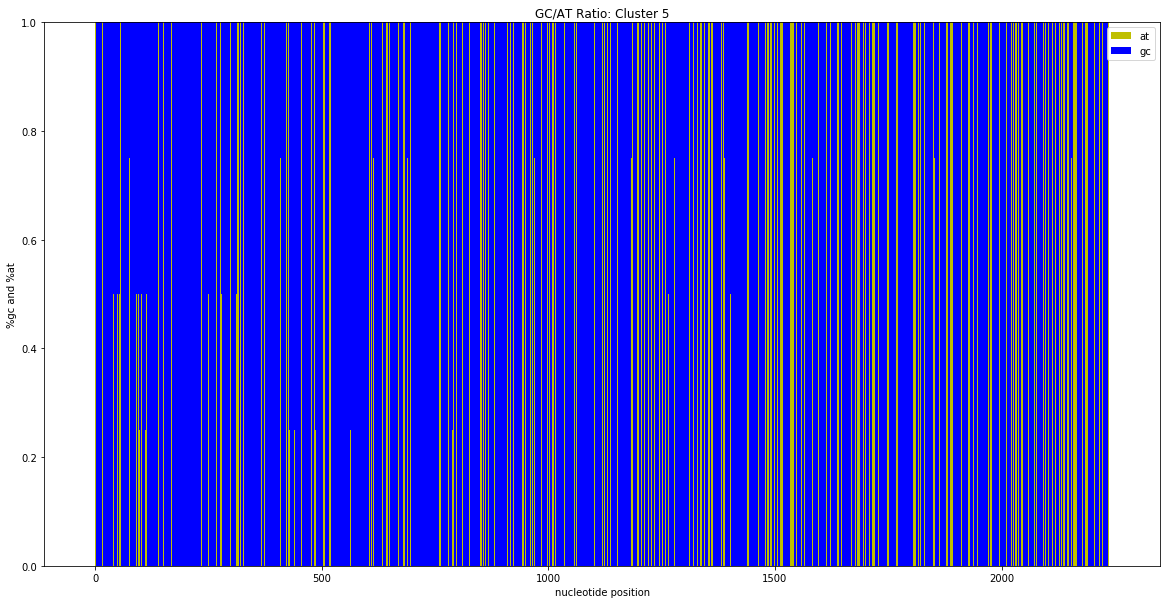

In [51]:
at = np.array(at_df.iloc[4])
gc = np.array(gc_df.iloc[4])
ratio_figure = plt.gcf()
indices = np.arange(2238)
ratio_figure.set_size_inches(20,10)
width = 2
plot_at = plt.bar(indices, at, width, color='y')
plot_gc = plt.bar(indices, gc, width, bottom=at, color='b')
plt.title('GC/AT Ratio: Cluster 5')
plt.legend((plot_at[0], plot_gc[0]), ('at','gc'))
plt.xlabel('nucleotide position')
plt.ylabel('%gc and %at')
plt.show()

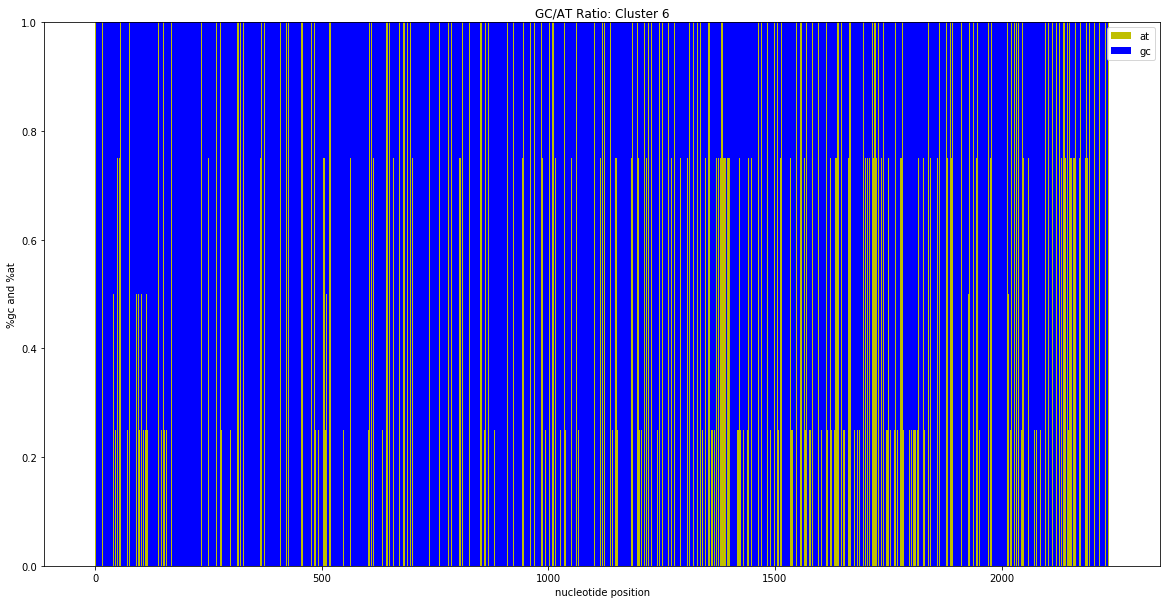

In [52]:
at = np.array(at_df.iloc[5])
gc = np.array(gc_df.iloc[5])
ratio_figure = plt.gcf()
indices = np.arange(2238)
ratio_figure.set_size_inches(20,10)
width = 2
plot_at = plt.bar(indices, at, width, color='y')
plot_gc = plt.bar(indices, gc, width, bottom=at, color='b')
plt.title('GC/AT Ratio: Cluster 6')
plt.legend((plot_at[0], plot_gc[0]), ('at','gc'))
plt.xlabel('nucleotide position')
plt.ylabel('%gc and %at')
plt.show()

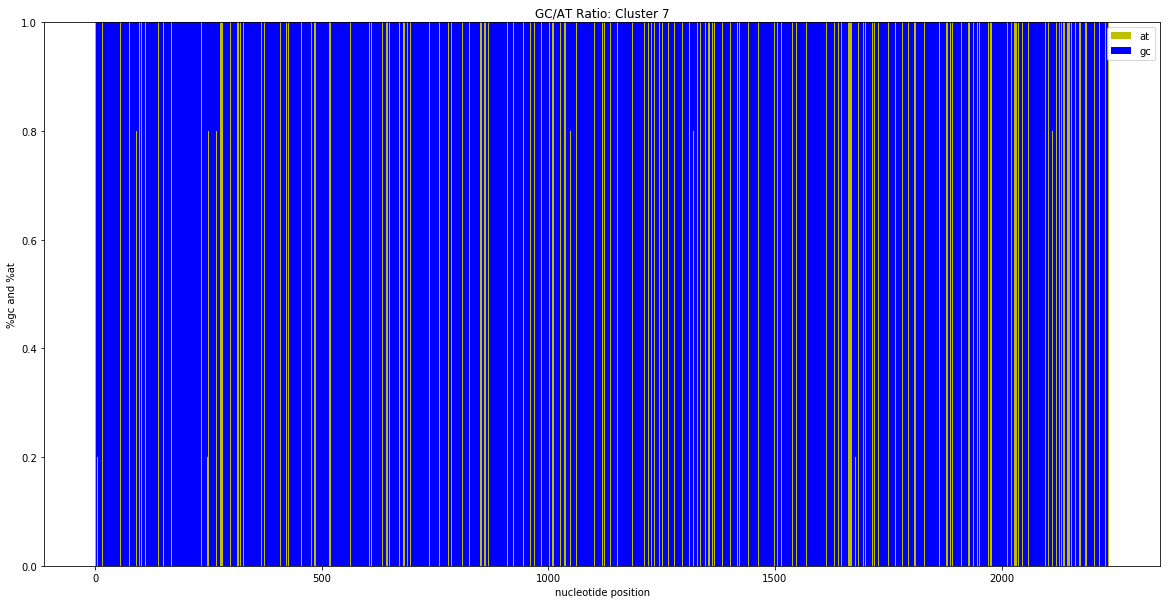

In [53]:
at = np.array(at_df.iloc[6])
gc = np.array(gc_df.iloc[6])
ratio_figure = plt.gcf()
indices = np.arange(2238)
ratio_figure.set_size_inches(20,10)
width = 2
plot_at = plt.bar(indices, at, width, color='y')
plot_gc = plt.bar(indices, gc, width, bottom=at, color='b')
plt.title('GC/AT Ratio: Cluster 7')
plt.legend((plot_at[0], plot_gc[0]), ('at','gc'))
plt.xlabel('nucleotide position')
plt.ylabel('%gc and %at')
plt.show()

##### Analysis: These cluster graphs indicate the extent to which members of the cluster are homologous, and proves very informative in pinpointing exactly where in the 2238 base pair sequence the variation/mutation occured that distinguishes the cluster members. The short bars on the plot that indicate base pair variation are both visually easy to see and computationally easy to quantify/count. Emperically, clusters 4 and 6 are the least homologous. 

## Plotting lengths based on un-aligned sequences

In [75]:
cluster_lengths = []
for cluster in dictionary_clusters.keys():
    cluster_a = dictionary_clusters.get(cluster)
    for i in list(range(len(cluster_a))):
        gene = cluster_a[i]
        gene_len = len(seqdict.get(gene).seq)
        cluster_lengths.append([cluster, gene, gene_len])

In [111]:
df_clusterlengths = pd.DataFrame(cluster_lengths, columns = ['cluster', 'gene','gene_length'])
a = df_clusterlengths[df_clusterlenghts.cluster == 'cluster_1']['gene_length']
b = df_clusterlengths[df_clusterlengths.cluster == 'cluster_2']['gene_length']
c = df_clusterlengths[df_clusterlengths.cluster == 'cluster_3']['gene_length']
d = df_clusterlengths[df_clusterlengths.cluster == 'cluster_4']['gene_length']
e = df_clusterlengths[df_clusterlengths.cluster == 'cluster_5']['gene_length']
f = df_clusterlengths[df_clusterlengths.cluster == 'cluster_6']['gene_length']
g = df_clusterlengths[df_clusterlengths.cluster == 'cluster_7']['gene_length']

box_plot_data = [a, b, c, d, e, f, g]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [112]:
df_clusterlengths

,cluster,gene,gene_length
0,cluster_1,pi.2,2196
1,cluster_1,pi.3,2196
2,cluster_1,pi.1,2196
3,cluster_2,rh.10,2217
4,cluster_2,bb.1,2217
5,cluster_2,bb.2,2217
6,cluster_2,hu.17,2217
7,cluster_2,hu.6,2217
8,cluster_3,hu.67,2217
9,cluster_3,hu.37,2217


## Graphing Sequence Length Averages per Cluster using boxplot( )

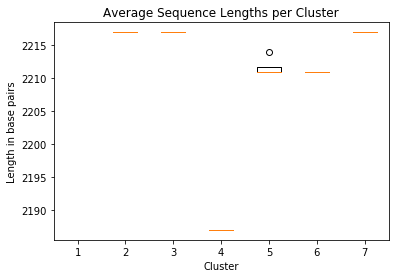

In [114]:
fig, ax = plt.subplots()

ax.boxplot(box_plot_data)

ax.set_title('Average Sequence Lengths per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Length in base pairs')
plt.show()

##### Analysis: This confirms our emperical data from the GC/AT ratio graphs by indicating a higher level of homology in some clusters. Genetically homologous/close ancestor clusters have smaller box representations because the difference between the 25th percentile and 75th percentile sequence lengths is much smaller. On the box plot above, the viruses in clusters 2, 3, 4, 6, 7 appear to have the same un-aligned length (25th and 75th percentile lengths are equal), confirming our choice of clustering and genetic relationship